# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# NLP libraries to clean the text data
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
# Vectorization technique TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# For Splitting the dataset
from sklearn.model_selection import train_test_split

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Accuracy measuring library
from sklearn.metrics import accuracy_score


# 2. Drive Mount

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
file_path = '/content/gdrive/MyDrive/PR Project/data.csv'
data = pd.read_csv(file_path)

In [4]:
data.head() # Returns the first 5 rows of the dataset

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [5]:
data.columns # Returns the column headings

Index(['URLs', 'Headline', 'Body', 'Label'], dtype='object')

In [6]:
data.isnull().sum() #To check the null values in the dataset, if any

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

# 3. Data-Preprocessing

In [7]:
df = data.copy() #Creating a copy of my data, I will be working on this Dataframe

# 3.1 Removing the Null Values

In [8]:
df['Body'] = df['Body'].fillna('')   # As Body is empty, just filled with an empty space
df['URLs'] = df['URLs'].fillna('')   # As Body is empty, just filled with an empty space
df['Headline'] = df['Headline'].fillna('')   # As Body is empty, just filled with an empty space
df['Label'] = df['Label'].fillna('')   # As Body is empty, just filled with an empty space

In [9]:
df.isnull().sum()  # No null values found

URLs        0
Headline    0
Body        0
Label       0
dtype: int64

In [10]:
df.shape

(4009, 4)

# 3.2 Adding a new column

In [11]:
df['News'] = df['Headline']+df['Body']
df.head()

,URLs,Headline,Body,Label,News
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,Four ways Bob Corker skewered Donald TrumpImag...
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,Linklater's war veteran comedy speaks to moder...
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,Trump’s Fight With Corker Jeopardizes His Legi...
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,Jason Aldean opens 'SNL' with Vegas tributeCou...


# 3.3 Drop features that are not needed

In [12]:
features_dropped = ['URLs','Headline','Body']
df = df.drop(features_dropped, axis =1)

In [13]:
df.columns

Index(['Label', 'News'], dtype='object')

In [14]:
df.head()

,Label,News
0,1,Four ways Bob Corker skewered Donald TrumpImag...
1,1,Linklater's war veteran comedy speaks to moder...
2,1,Trump’s Fight With Corker Jeopardizes His Legi...
3,1,Egypt's Cheiron wins tie-up with Pemex for Mex...
4,1,Jason Aldean opens 'SNL' with Vegas tributeCou...


In [15]:
import collections
import plotly.express as px


words = []
for text in df['News'] :
    # Check if the value is not NaN before attempting to split
    if isinstance(text, str):
        words.extend(text.split())

word_count = collections.Counter(words)
top_words = dict(word_count.most_common(50))

# Create a Plotly bar chart
fig = px.bar(x=list(top_words.keys()), y=list(top_words.values()), labels={'x': 'Words', 'y': 'Frequency'})
fig.update_layout(title_text='Top 50 most used words', title_font_size=18)
fig.show()

<Axes: >

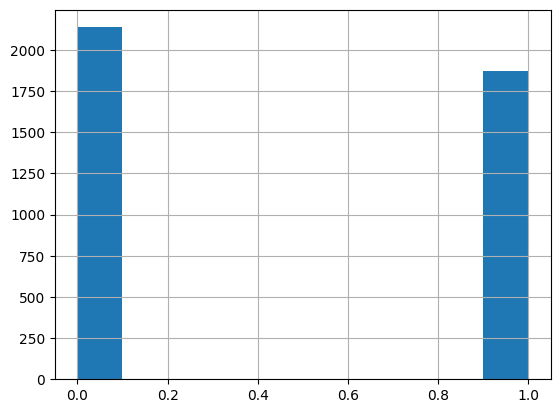

In [16]:
data_labels = data['Label']
data_labels.hist()

# 3.4 Text Processing

In [17]:
import nltk

# Uncomment the line below and run it to download the 'stopwords' corpus
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def wordopt(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    return text


In [19]:
df['News'] = df['News'].apply(wordopt) #Applying the text processing techniques onto every row data

In [20]:
df.head()

,Label,News
0,1,four way bob corker skewer donald trumpimag co...
1,1,linklat war veteran comedi speak modern americ...
2,1,trump fight corker jeopard legisl agendath feu...
3,1,egypt cheiron win tie pemex mexican onshor oil...
4,1,jason aldean open snl vega tributecountri sing...


# 4. Splitting DataSet

In [21]:
X = df['News']
Y = df['Label']

#Split the data into training and test set
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [22]:
#Vectorization
vectorization = TfidfVectorizer()
filtered_data = X.apply(wordopt)

In [23]:
filtered_data

0       four way bob corker skewer donald trumpimag co...
1       linklat war veteran comedi speak modern americ...
2       trump fight corker jeopard legisl agendath feu...
3       egypt cheiron win tie pemex mexican onshor oil...
4       jason aldean open snl vega tributecountri sing...
                              ...                        
4004    trend watchtrend watch reader think stori fact...
4005    trump jr soon give minut speech trump jr soon ...
4006                       ron paul trump anarch altright
4007    china accept oversea trial data bid speed drug...
4008    vice presid mike penc leav nfl game anti ameri...
Name: News, Length: 4009, dtype: object

# 5. Vectorization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

n=1
ngram_range=(n, n)
vectorizer = TfidfVectorizer(ngram_range=ngram_range)
X = vectorizer.fit_transform(filtered_data)
tfidf_matrix = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
X.shape

(4009, 32394)

In [25]:
from sklearn import preprocessing
X = preprocessing.normalize(X)
print(X)

  (0, 14066)	0.03960854008565452
  (0, 29785)	0.0464269370096059
  (0, 17856)	0.03731229050596228
  (0, 4665)	0.02034671483382881
  (0, 27037)	0.0204611277814754
  (0, 26853)	0.019963547108631855
  (0, 14663)	0.023208271756503
  (0, 21834)	0.02535019984523268
  (0, 15858)	0.02007040402008232
  (0, 1280)	0.028273661899246186
  (0, 21437)	0.02296333635978878
  (0, 153)	0.02185145783251503
  (0, 29916)	0.04353400466989944
  (0, 8197)	0.035406764687663114
  (0, 2483)	0.020717248740366075
  (0, 17187)	0.02192581226980691
  (0, 31589)	0.0274225764699786
  (0, 31332)	0.021681668935791723
  (0, 7665)	0.031217845704475423
  (0, 3768)	0.022207114928996803
  (0, 9227)	0.012619838186868433
  (0, 16344)	0.016244694987301054
  (0, 20031)	0.016118035592893643
  (0, 5950)	0.032847060709028104
  (0, 7623)	0.02405006278141994
  :	:
  (4008, 27285)	0.014899015981832586
  (4008, 19220)	0.03299665924807578
  (4008, 16993)	0.013489224903045974
  (4008, 6727)	0.04276316327753172
  (4008, 16569)	0.01498039764

In [26]:
print("Number of missing values in X:", X.size - X.count_nonzero())

Number of missing values in X: 0


In [27]:
print(Y.isna().sum())

0


In [28]:
print("Number of samples in X:", X.getnnz())
print("Number of samples in data_targets:", len(Y))

Number of samples in X: 683780
Number of samples in data_targets: 4009


In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y,train_size = 0.8, test_size=0.2, random_state=42)

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

# Helper function to print accuracy, precision, recall, F1 for multi-class classification
def print_metrics(target_test, predicted):
    print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test, predicted)))
    print("%-12s %f" % ('Precision:', metrics.precision_score(target_test, predicted, average='weighted')))
    print("%-12s %f" % ('Recall:', metrics.recall_score(target_test, predicted, average='weighted')))
    print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_test, predicted, average='weighted')))

# Helper function that allows you to draw nicely formatted confusion matrices for multi-class classification
def draw_confusion_matrix(y, yhat, classes):
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)

    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [31]:
print("Number of features in x_train:", x_train.shape[1])
print("Number of features in x_test:", x_test.shape[1])


Number of features in x_train: 32394
Number of features in x_test: 32394


Accuracy:    0.975062
Precision:   0.975766
Recall:      0.975062
F1 Score:    0.975114


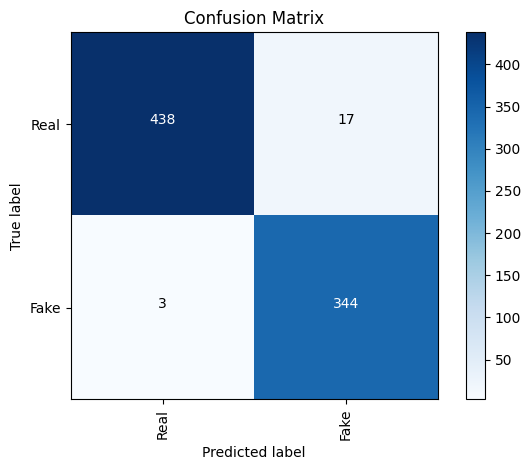

In [32]:
# fitting the dataset to a logistic regression model
import numpy as np
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty='l2', max_iter=1000)

log_reg.fit(x_train, y_train)
log_predicted = log_reg.predict(x_test)
log_score = log_reg.predict_proba(x_test)[:,1]

print_metrics(y_test, log_predicted)
draw_confusion_matrix(y_test, log_predicted, classes=['Real', 'Fake'])

Epoch 1/5
81/81 [==============================] - 11s 112ms/step - loss: 0.4355 - accuracy: 0.8016 - val_loss: 0.1174 - val_accuracy: 0.9611
Epoch 2/5
81/81 [==============================] - 9s 108ms/step - loss: 0.0528 - accuracy: 0.9813 - val_loss: 0.0425 - val_accuracy: 0.9798
Epoch 3/5
81/81 [==============================] - 6s 74ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0328 - val_accuracy: 0.9844
Epoch 4/5
81/81 [==============================] - 5s 57ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0305 - val_accuracy: 0.9844
Epoch 5/5
26/26 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9776
Test accuracy: 0.9775561094284058
26/26 [==============================] - 0s 2ms/step
Accuracy:    0.977556
Precision:   0.977933
Recall:      0.977556
F1 Score:    0.977591


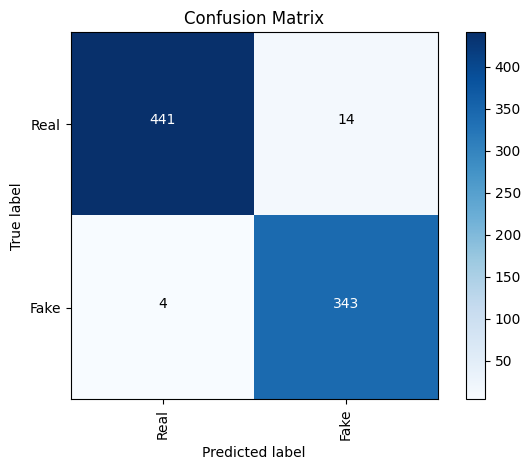

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assuming 'texts' is a list of your text data and 'labels' is a list of corresponding labels (0 or 1)
# Replace these placeholders with your actual data loading code

# Tokenize and pad sequences
max_words = 10000  # Adjust based on your vocabulary size
maxlen = 100  # Adjust based on your maximum sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(filtered_data)
sequences = tokenizer.texts_to_sequences(filtered_data)
X = pad_sequences(sequences, maxlen=maxlen)
y = Y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model architecture
embedding_dim = 50  # Adjust based on your word embeddings dimension

model = models.Sequential()
model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions
predictions = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Print metrics
print_metrics(y_test, binary_predictions)

# Draw confusion matrix
draw_confusion_matrix(y_test, binary_predictions, classes=['Real', 'Fake'])


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

max_features = 2000

# Assuming you have filtered_train and data_labels for your training data
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(filtered_data)
X_tokenized = tokenizer.texts_to_sequences(filtered_data)
X_padded = pad_sequences(X_tokenized)

# Encode labels into categorical format
y_categorical = to_categorical(Y, num_classes=2)

# Split the data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=4)


In [ ]:
X_padded.shape

(4009, 2189)

In [ ]:
import numpy as np

# Assuming y_categorical is your one-hot encoded labels
class_counts = np.sum(y_categorical, axis=0)

# Print the counts for each class
for i, count in enumerate(class_counts):
    print(f"Class {i}: {count} data points")

Class 0: 2137.0 data points
Class 1: 1872.0 data points


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import layers, regularizers
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Assuming you have filtered_train and data_labels for your training data
max_features = 2000

# Tokenizing and padding the data for RNN
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(filtered_data)
X_tokenized = tokenizer.texts_to_sequences(filtered_data)
X_padded = pad_sequences(X_tokenized)

# Encode labels into categorical format
y_categorical = to_categorical(Y, num_classes=2)

# Split the data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=4)

# hyperparameters
embed_vec_size = 120
num_layers = 200
batch_size = 32
learning_rate = 0.0001
dropout_rate = 0.5
reg_strength = 0.005
patience = 10

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embed_vec_size))
model.add(layers.LSTM(num_layers, dropout=dropout_rate, return_sequences=True))
model.add(BatchNormalization())
model.add(layers.LSTM(num_layers, dropout=dropout_rate))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
model.add(Dense(units=2, activation='sigmoid'))
# Compile the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(X_train_rnn, y_train_rnn, epochs=50, batch_size=batch_size,
                 validation_data=(X_test_rnn, y_test_rnn), callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(X_test_rnn, y_test_rnn)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])


Epoch 1/50
101/101 [==============================] - 38s 337ms/step - loss: 1.0402 - accuracy: 0.7166 - val_loss: 1.0687 - val_accuracy: 0.5200
Epoch 2/50
101/101 [==============================] - 30s 299ms/step - loss: 0.6389 - accuracy: 0.9124 - val_loss: 0.9580 - val_accuracy: 0.9352
Epoch 3/50
101/101 [==============================] - 28s 280ms/step - loss: 0.5315 - accuracy: 0.9476 - val_loss: 0.7755 - val_accuracy: 0.9589
Epoch 4/50
101/101 [==============================] - 26s 262ms/step - loss: 0.4666 - accuracy: 0.9691 - val_loss: 0.5693 - val_accuracy: 0.9601
Epoch 5/50
101/101 [==============================] - 26s 261ms/step - loss: 0.4165 - accuracy: 0.9757 - val_loss: 0.4577 - val_accuracy: 0.9626
Epoch 6/50
101/101 [==============================] - 26s 259ms/step - loss: 0.4059 - accuracy: 0.9729 - val_loss: 0.4118 - val_accuracy: 0.9651
Epoch 7/50
101/101 [==============================] - 25s 243ms/step - loss: 0.3640 - accuracy: 0.9841 - val_loss: 0.4074 - val_ac

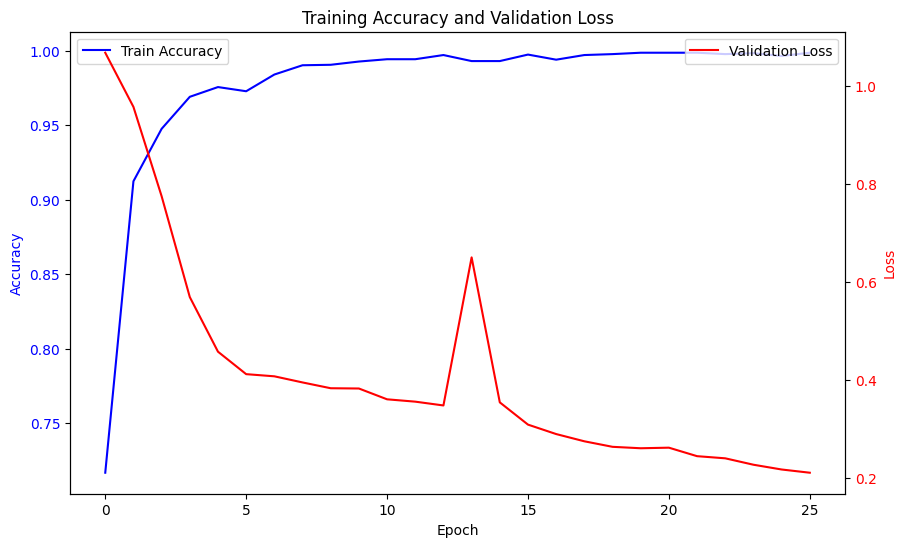

In [ ]:
import matplotlib.pyplot as plt

# Assuming `hist` is the training history obtained during model training

# Plot training accuracy and validation loss on the same graph
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(hist.history['accuracy'], label='Train Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy', color='blue')
plt.tick_params(axis='y', labelcolor='blue')
plt.legend(loc='upper left')

# Create a second y-axis for validation loss
plt.twinx()

# Plot validation loss
plt.plot(hist.history['val_loss'], label='Validation Loss', color='red')
plt.ylabel('Loss', color='red')
plt.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper right')

plt.title('Training Accuracy and Validation Loss')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, BatchNormalization, Dropout, LSTM, Bidirectional
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Assuming you have filtered_train and data_labels for your training data
max_features = 2000

# Tokenizing and padding the data for RNN
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(filtered_data)
X_tokenized = tokenizer.texts_to_sequences(filtered_data)
X_padded = pad_sequences(X_tokenized)

# Encode labels into categorical format
y_categorical = to_categorical(Y, num_classes=2)

# Split the data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=4)

# hyperparameters
embed_vec_size = 120
num_layers = 200
batch_size = 32
learning_rate = 0.0001
dropout_rate = 0.5
reg_strength = 0.005
patience = 10

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embed_vec_size))
model.add(Bidirectional(LSTM(num_layers, dropout=dropout_rate, return_sequences=True)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(num_layers, dropout=dropout_rate)))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
model.add(Dense(units=2, activation='sigmoid'))

# Compile the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(X_train_rnn, y_train_rnn, epochs=50, batch_size=batch_size,
                 validation_data=(X_test_rnn, y_test_rnn), callbacks=[early_stopping])

# Evaluate the model
score = model.evaluate(X_test_rnn, y_test_rnn)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/50
101/101 [==============================] - 68s 590ms/step - loss: 1.1336 - accuracy: 0.6913 - val_loss: 1.1173 - val_accuracy: 0.5212
Epoch 2/50
101/101 [==============================] - 54s 532ms/step - loss: 0.6646 - accuracy: 0.9267 - val_loss: 1.0243 - val_accuracy: 0.9227
Epoch 3/50
101/101 [==============================] - 54s 531ms/step - loss: 0.5557 - accuracy: 0.9560 - val_loss: 0.8543 - val_accuracy: 0.9190
Epoch 4/50
101/101 [==============================] - 53s 520ms/step - loss: 0.4914 - accuracy: 0.9710 - val_loss: 0.6071 - val_accuracy: 0.9514
Epoch 5/50
101/101 [==============================] - 52s 517ms/step - loss: 0.4449 - accuracy: 0.9819 - val_loss: 0.4885 - val_accuracy: 0.9663
Epoch 6/50
101/101 [==============================] - 53s 524ms/step - loss: 0.4173 - accuracy: 0.9872 - val_loss: 0.4619 - val_accuracy: 0.9676
Epoch 7/50
101/101 [==============================] - 51s 507ms/step - loss: 0.4061 - accuracy: 0.9838 - val_loss: 0.4687 - val_ac

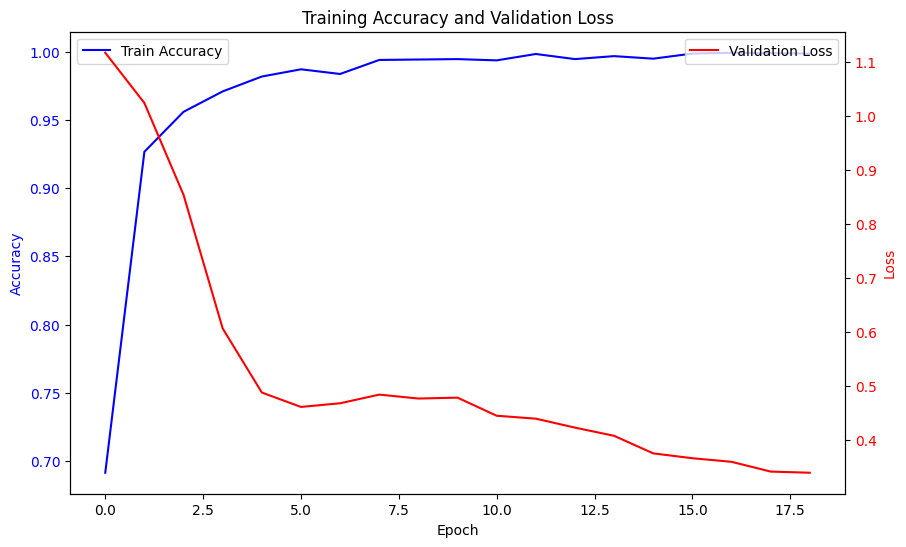

In [ ]:
import matplotlib.pyplot as plt

# Assuming `hist` is the training history obtained during model training

# Plot training accuracy and validation loss on the same graph
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(hist.history['accuracy'], label='Train Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy', color='blue')
plt.tick_params(axis='y', labelcolor='blue')
plt.legend(loc='upper left')

# Create a second y-axis for validation loss
plt.twinx()

# Plot validation loss
plt.plot(hist.history['val_loss'], label='Validation Loss', color='red')
plt.ylabel('Loss', color='red')
plt.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper right')

plt.title('Training Accuracy and Validation Loss')
plt.show()